### Basic image minipulation 

#### - prerequisites for imaging detection on tensorflow

In [38]:
import os
import numpy as np
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
%matplotlib inline

#### Create a dictionary and download images

In [15]:
# Create a directory
path = '../data/0_img_align_celeba'
try: 
    os.mkdir(path) 
except: 
    pass

# Now perform the following 10 times:
for img_i in range(1, 11):
    # create a string using the current loop counter
    f = '000%03d.jpg' % img_i
    # and get the url with that string appended the end
    url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f
    # We'll print this out to the console so we can see how far we've gone
    print(url, end='\r')
    # And now download the url to a location inside our new directory
    urllib.request.urlretrieve(url, os.path.join(path, f))

#### Load images

(218, 178, 3)


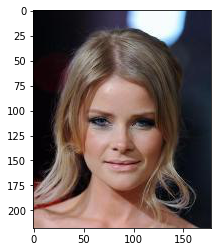

In [31]:
## list files 
files = [os.path.join(path,file_i) for file_i in os.listdir(path)
         if file_i.endswith('.jpg')]          ## if it end with jpg
## read one image into memory
img = plt.imread(files[0])                    ## it is basically a 3d numpy array
print(img.shape)                                     ## because it is a colored image, has RGB values
## show the image
plt.imshow(img)

#### RGB representation of an image

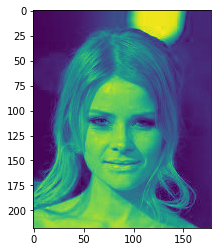

In [35]:
## show only one of the color channel 
plt.figure()
plt.imshow(img[:, :, 0])

#### Visualizing your data as image

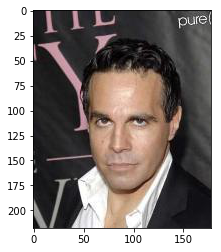

In [44]:
## show an random image in our folder
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

f = files[np.random.randint(0, len(files))]
plot_image(f)

## Image Manipulation

#### Cropping images

In many applications of deep learning, we will need all of our data to be the same size. For images this means we'll need to crop the images while trying not to remove any of the important information in it.

This will convert the image to a square one, meaning its sides will be the same lengths. The reason for doing this is that we can then resize this square image to any size we'd like, without distorting the image.

In [56]:
#### crop images to square
def imcrop_tosquare(img):
    """Make any image a square image.
    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    ## this will crop out top and bottom pixls to make it a square matrix
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]    ## // notation is to perfomr an integer division : 3//2 =1
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]     
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop   

## this function will just crop the image by percentage
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

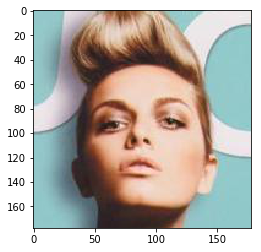

In [53]:
## let's show a cropped image 
f = files[np.random.randint(0, len(files))]
img = imcrop_tosquare(plt.imread(f))
plt.imshow(img)

#### Resizing images

In [54]:
from scipy.misc import imresize

The imresize function takes a input image as its first parameter, and a tuple defining the new image shape as rows and then columns.

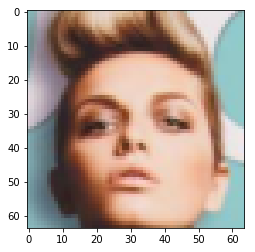

In [63]:
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (64, 64))
plt.imshow(rsz)

(64, 64)


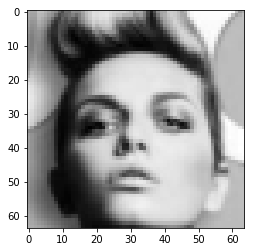

In [65]:
### we can also combine R G B value into one (R+G+B)/3 , and show them in Grey scale
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

### Run the entire process (cropping/resizing)

In [66]:
## process all the images in our folder 
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)     ## crop to square img
    crop = imcrop(square, 0.2)        ## zoom in a little bit, crop out the background
    rsz = imresize(crop, (64, 64))    ## resize to 64X64
    imgs.append(rsz)                  #3 add to the list 
print(len(imgs))

10


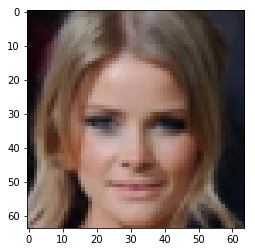

In [71]:
## take a look at one
plt.imshow(imgs[0])

## The Batch Dimension

- There is a convention for storing many images in an array using a new dimension called the batch dimension. The resulting image shape should be:
- N x H x W x C
- The Number of images, or the batch size, is first; then the Height or number of rows in the image; then the Width or number of cols in the image; then finally the number of channels the image has. A Color image should have 3 color channels, RGB. A Grayscale image should just have 1 channel.


In [77]:
### so each row is an image, each image is a 3d matrix 
data = np.array(imgs)
data.shape

(10, 64, 64, 3)